# <center>Globex Industrial Case</center>
<center><font size="3">Analysis done by: <b>Walid Ismail (wismail@eg.ibm.com)</b></font></center><br>

# 0. Introduction
Globex is a large industrial company with presence in six continents. They produce large industrial products such as ships, power plants, engines, etc. The CFO is examining profitability for numerous projects around the world, starting with projects beginning in 2010. They believe that using data and analytics can help identify projects that may be risky and result in a loss of profit. Globex has compiled data on all completed projects with a start date of 2010 or later. Globex needs the following:

1. Determine the key predictors of a project’s “PROFIT_PLAN”.
2. Develop an actionable, innovative strategy for the client.
3. Prepare a deliverable that is clear and concise, outlining each of your key recommendations.


# 1. Import the necessary libraries

In [3]:
# Import main needed libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
%matplotlib inline
#%config InlineBackend.print_figure_kwargs={'bbox_inches':None}

import seaborn as sns
sns.set_style("white")
sns.set_style("ticks")

# 2. Load the data file

In [4]:
pd.set_option('display.width', 3000)
pd.set_option('display.max.columns', 500) # display up to 500 colums without "..." use horizontal scrolling instead
pd.set_option('display.max.rows', 50)

Watson_Studio_Env = False

if(Watson_Studio_Env == True):
    # The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
    # from project_lib import Project
    project = Project(project_id='01cb8ab3-b48d-441d-8d33-edc6caae425d', project_access_token='p-d36f9300425b2c63be8cd6c20d68a07ef91ec977')
    pc = project.project_context

    # Fetch the Customer file
    my_file = project.get_file("Globex_Data_Set.csv")
    my_file.seek(0)
    globex_df = pd.read_csv(my_file)
else:
    globex_df = pd.read_csv('Globex_Data_Set.csv')

print("\nNumber of projects: {}".format(len(globex_df)))
globex_df.head()


Number of projects: 500


,PROJ_CD_TFD,R1,R2,R3,R4,R5,R6,R7,PROJ_DURN,CNTRY_DFT,CNTRY,REGION,FTE_INT,FTE_CONTR,CC,CUST,INSUR_BEFORE_AMT,INSUR_AFTER_AMT,INSUR_AMT,TAX_RT,CAP_UTIL,GNT_INVEST,LIQ_RSK,DIM_CONSTR,IPI,CTRCT_AMT_PLAN,PROFIT_PLAN
0,2,1,2,3,4,5,3,10,273,0.224,10,4,10,5,11400,1,55000,40150,95150,0.04,0.98,375000,0.04,1100,91.9065,500000,624690
1,8,0,1,1,1,1,8,10,181,0.118,5,3,6,5,11600,1,312000,227760,539760,0.08,0.95,1846000,0.19,1900,91.9065,2600000,3172233
2,9,1,2,2,2,2,8,6,273,0.140,5,3,3,3,11200,3,300000,219000,519000,0.11,0.99,875000,0.17,300,91.9065,2500000,2511626
3,3,0,1,3,3,3,4,1,90,0.103,9,4,4,4,11200,5,506000,344080,850080,0.08,0.89,2116000,0.00,1400,91.9065,4600000,5238419
4,5,0,1,2,1,5,8,5,273,0.051,6,3,4,3,10400,4,60000,41400,101400,0.05,0.85,220000,0.12,2000,91.9065,500000,548199


# 3. Exploratory Data Analysis
Lets now look at some exploratory information about our dataset and the variables in it to get a flovor of its different aspects. We will look at:<br>
- Number of observations<br>
- Number of columns<br>
- Types of columns<br>
- Does our dataset has empty cells or not?
- Descriptive statistics for each variable
- Histograms of the variables
- Scatter plots of continious variables against each other
- Scatter plots of dicreate numeric variables against the target

In [5]:
globex_df.shape # dimensions of data set

(500, 27)

In [6]:
globex_df.isnull().sum() # check if any cells have missing values

PROJ_CD_TFD         0
R1                  0
R2                  0
R3                  0
R4                  0
R5                  0
R6                  0
R7                  0
PROJ_DURN           0
CNTRY_DFT           0
CNTRY               0
REGION              0
FTE_INT             0
FTE_CONTR           0
CC                  0
CUST                0
INSUR_BEFORE_AMT    0
INSUR_AFTER_AMT     0
INSUR_AMT           0
TAX_RT              0
CAP_UTIL            0
GNT_INVEST          0
LIQ_RSK             0
DIM_CONSTR          0
IPI                 0
CTRCT_AMT_PLAN      0
PROFIT_PLAN         0
dtype: int64

In [7]:
globex_df.info() # check data type of each field

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 27 columns):
PROJ_CD_TFD         500 non-null int64
R1                  500 non-null int64
R2                  500 non-null int64
R3                  500 non-null int64
R4                  500 non-null int64
R5                  500 non-null int64
R6                  500 non-null int64
R7                  500 non-null int64
PROJ_DURN           500 non-null int64
CNTRY_DFT           500 non-null float64
CNTRY               500 non-null int64
REGION              500 non-null int64
FTE_INT             500 non-null int64
FTE_CONTR           500 non-null int64
CC                  500 non-null int64
CUST                500 non-null int64
INSUR_BEFORE_AMT    500 non-null int64
INSUR_AFTER_AMT     500 non-null int64
INSUR_AMT           500 non-null int64
TAX_RT              500 non-null float64
CAP_UTIL            500 non-null float64
GNT_INVEST          500 non-null int64
LIQ_RSK             500 non-nul

In [8]:
pd.set_option('display.float_format','{:,.2f}'.format)
globex_df.describe() # view statisical measures of variables

,PROJ_CD_TFD,R1,R2,R3,R4,R5,R6,R7,PROJ_DURN,CNTRY_DFT,CNTRY,REGION,FTE_INT,FTE_CONTR,CC,CUST,INSUR_BEFORE_AMT,INSUR_AFTER_AMT,INSUR_AMT,TAX_RT,CAP_UTIL,GNT_INVEST,LIQ_RSK,DIM_CONSTR,IPI,CTRCT_AMT_PLAN,PROFIT_PLAN
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,4.49,0.51,1.50,2.05,2.58,3.09,5.56,5.50,222.38,0.10,5.50,2.62,5.43,3.51,"11,006.00",3.09,"254,882.00","179,113.62","433,995.62",0.07,0.83,"1,322,450.00",0.10,"1,056.20",99.67,"2,550,600.00","2,972,775.20"
std,2.97,0.50,0.50,0.78,1.15,1.40,2.84,2.86,92.93,0.03,2.73,0.97,2.87,1.14,588.09,1.40,"150,431.76","106,380.56","256,565.80",0.03,0.11,"897,901.16",0.06,585.34,3.88,"1,431,586.01","1,699,158.93"
min,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.05,1.00,1.00,1.00,2.00,"10,100.00",1.00,"8,000.00","5,360.00","13,360.00",0.03,0.65,"30,000.00",0.00,100.00,91.91,"100,000.00","102,733.00"
25%,2.00,0.00,1.00,1.00,2.00,2.00,3.00,3.00,181.00,0.08,3.00,2.00,3.00,2.00,"10,500.00",2.00,"121,000.00","87,712.50","210,000.00",0.05,0.73,"567,000.00",0.04,500.00,96.50,"1,300,000.00","1,486,095.50"
50%,4.00,1.00,2.00,2.00,3.00,3.00,6.00,6.00,184.00,0.10,6.00,3.00,5.00,3.00,"11,000.00",3.00,"250,000.00","175,200.00","426,260.00",0.07,0.82,"1,184,500.00",0.09,"1,000.00",99.96,"2,600,000.00","3,056,513.50"
75%,7.00,1.00,2.00,3.00,4.00,4.00,8.00,8.00,275.00,0.12,8.00,3.00,8.00,5.00,"11,500.00",4.00,"370,000.00","257,800.00","629,250.00",0.10,0.92,"1,923,750.00",0.15,"1,600.00",102.46,"3,800,000.00","4,343,528.75"
max,9.00,1.00,2.00,3.00,4.00,5.00,10.00,10.00,366.00,0.22,10.00,4.00,10.00,5.00,"12,000.00",5.00,"600,000.00","438,000.00","1,038,000.00",0.12,1.00,"3,950,000.00",0.20,"2,000.00",106.69,"5,000,000.00","6,497,434.00"


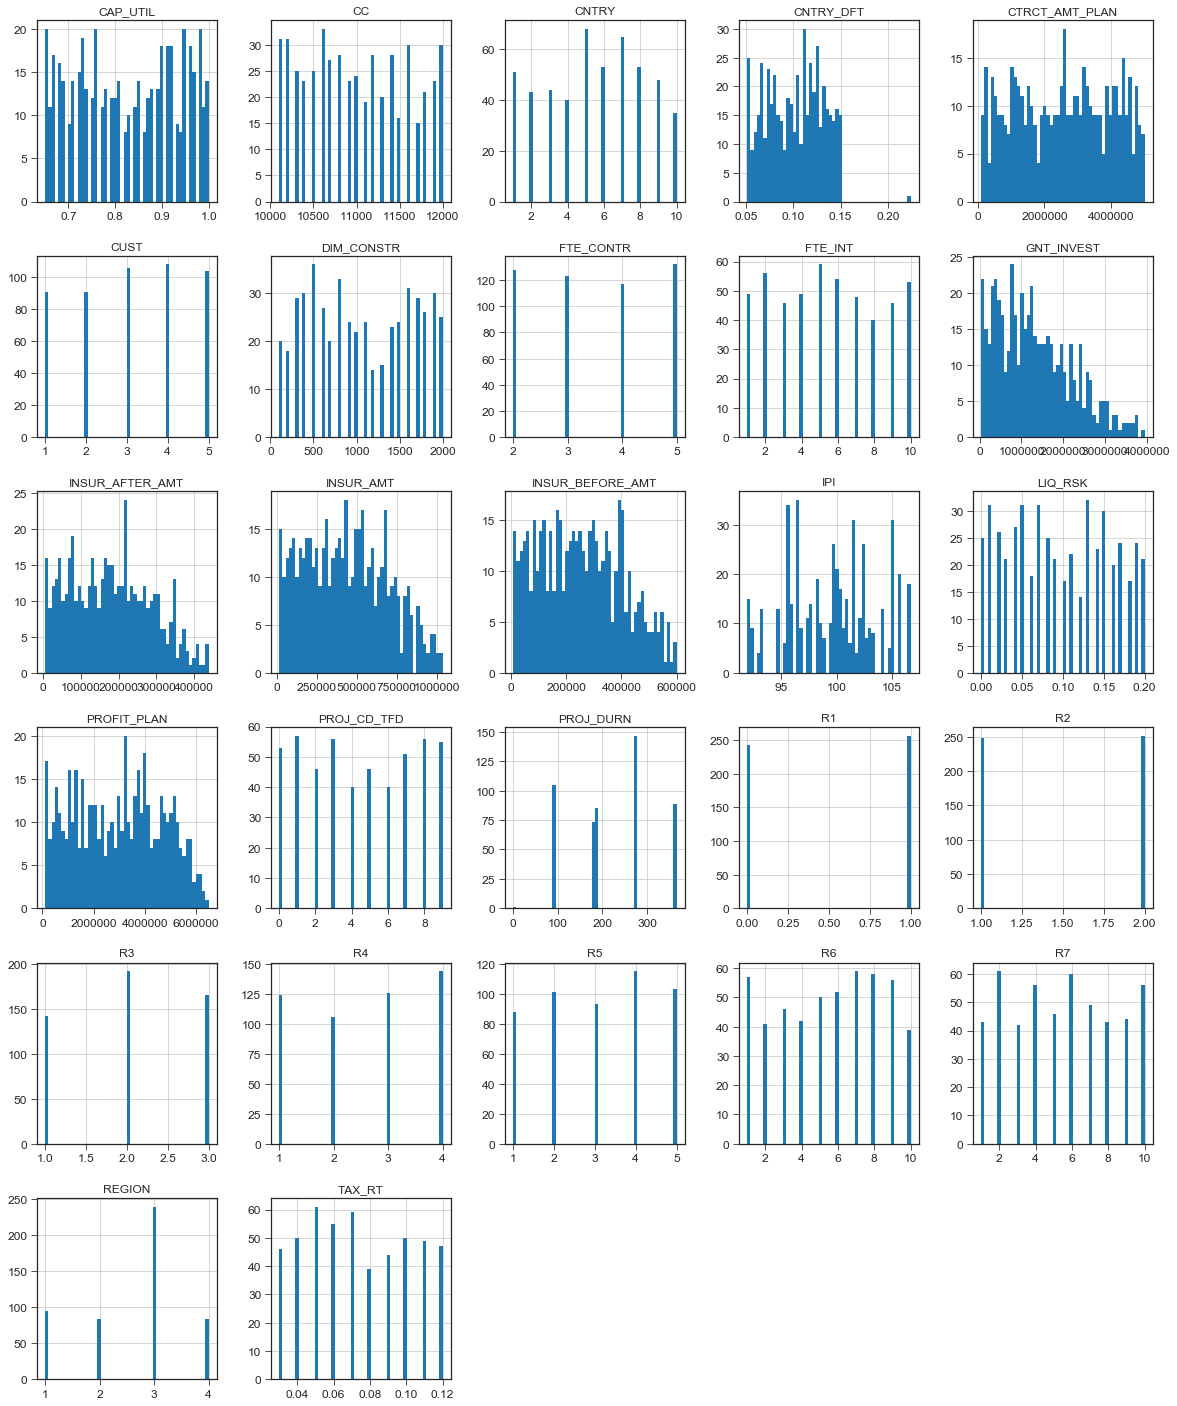

In [9]:
font = {'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)
plt.rc('axes', titlesize=12)     # fontsize of the axes title

globex_df.hist(bins=50, figsize=(20,25));

Text(0.5,0.92,'PROFIT_PLAN against all discrete numeric variables')

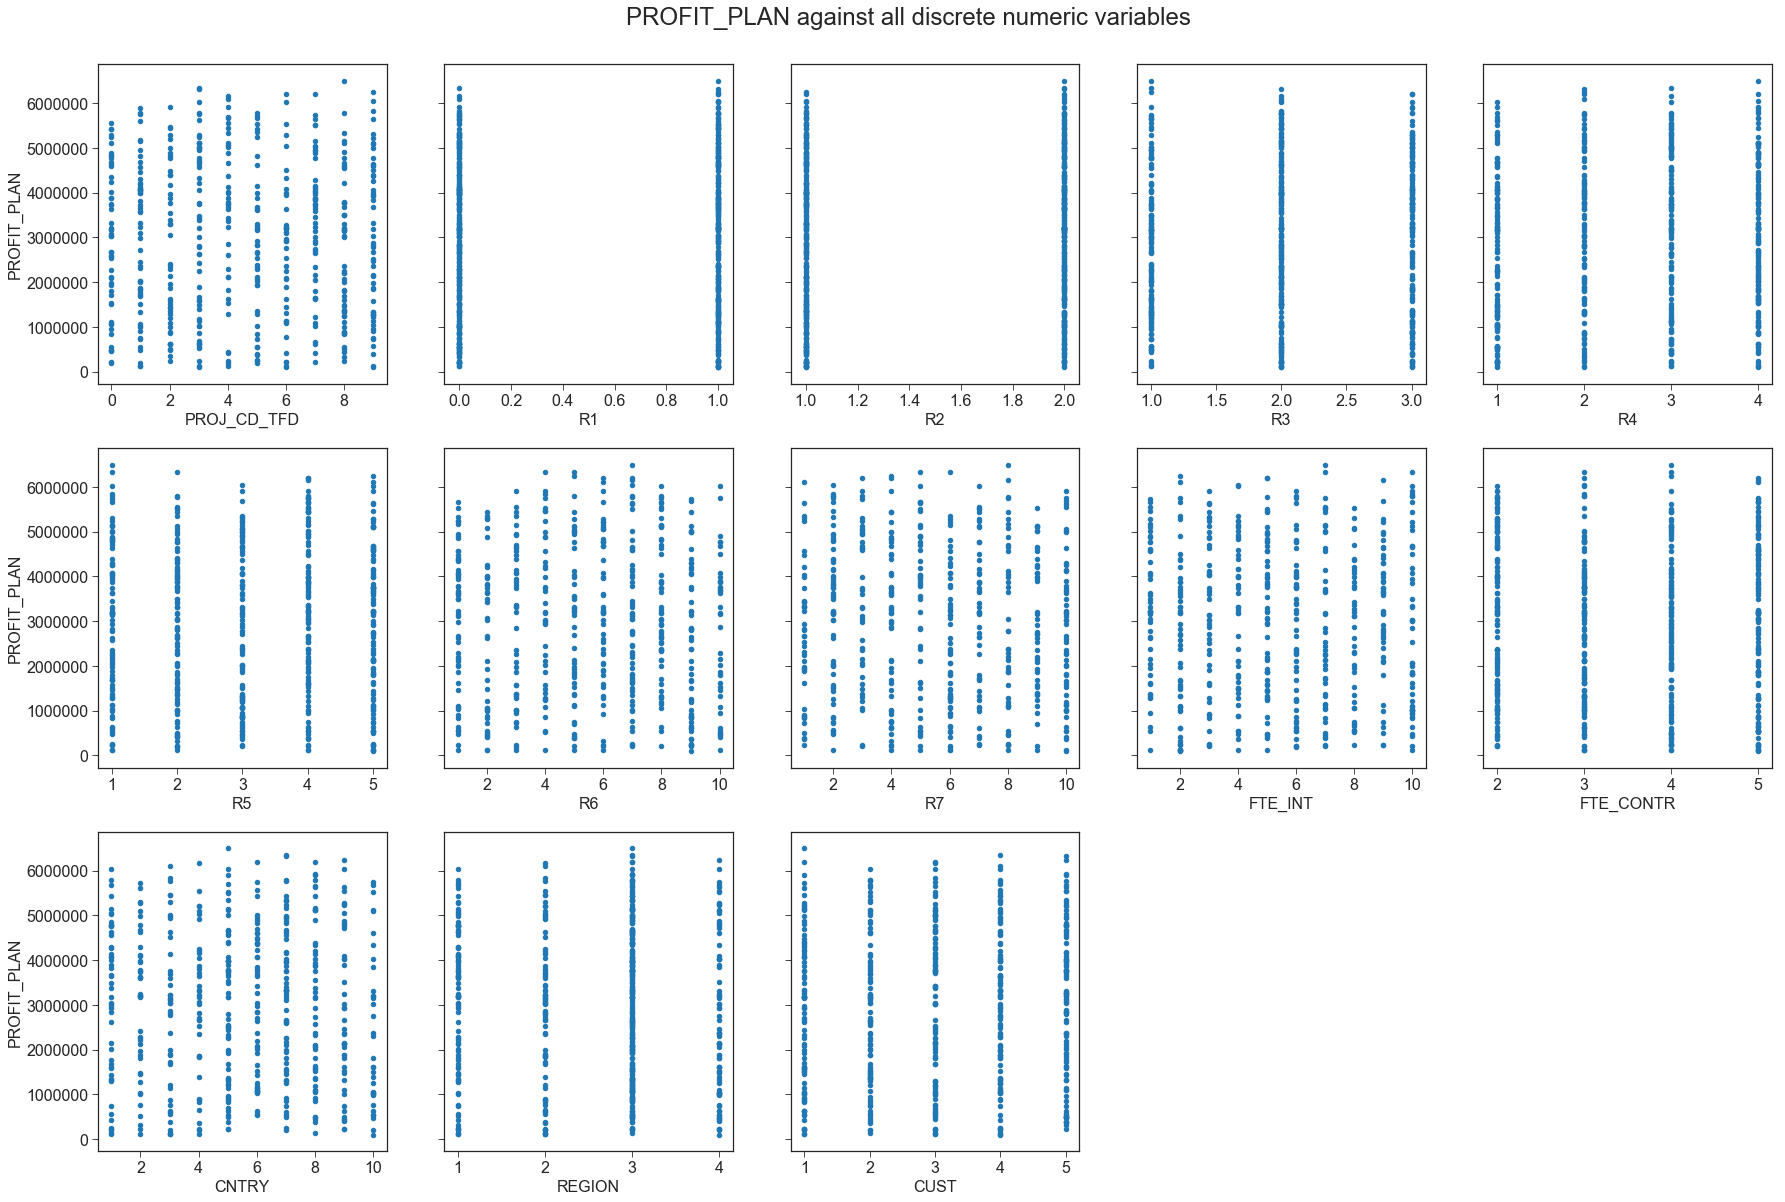

In [10]:
# Create scatter plot of numeric variables against PROFIT_PLAN

font = {'weight' : 'normal',
        'size'   : 16}

plt.rc('font', **font)
plt.rc('axes', titlesize=30)     # fontsize of the axes title

categorical_features = ['PROJ_CD_TFD', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 
                        'FTE_INT', 'FTE_CONTR', 
                        'CNTRY', 'REGION', 'CUST']

num = len(categorical_features)

fig_columns = 5
fig_rows = int(num / fig_columns) + int(num % fig_columns > 0)

fig, axs = plt.subplots(fig_rows, fig_columns, sharex=False, sharey=True, figsize=(30,20))
#plt.subplots_adjust(hspace=0.2)

for i, feat in enumerate(categorical_features):
    ax = globex_df.plot(kind='scatter', x=feat, y='PROFIT_PLAN', ax = axs[int(i/fig_columns), int(i%fig_columns)])
    ax.set_title('')
    fig2 = ax.get_figure()
    fig2.suptitle('')
     
for j in range(i+1, fig_columns*fig_rows):
    fig.delaxes(axs[int(j/fig_columns), int(j%fig_columns)])
    
fig.suptitle('PROFIT_PLAN against all discrete numeric variables', fontsize=24, y=0.92)

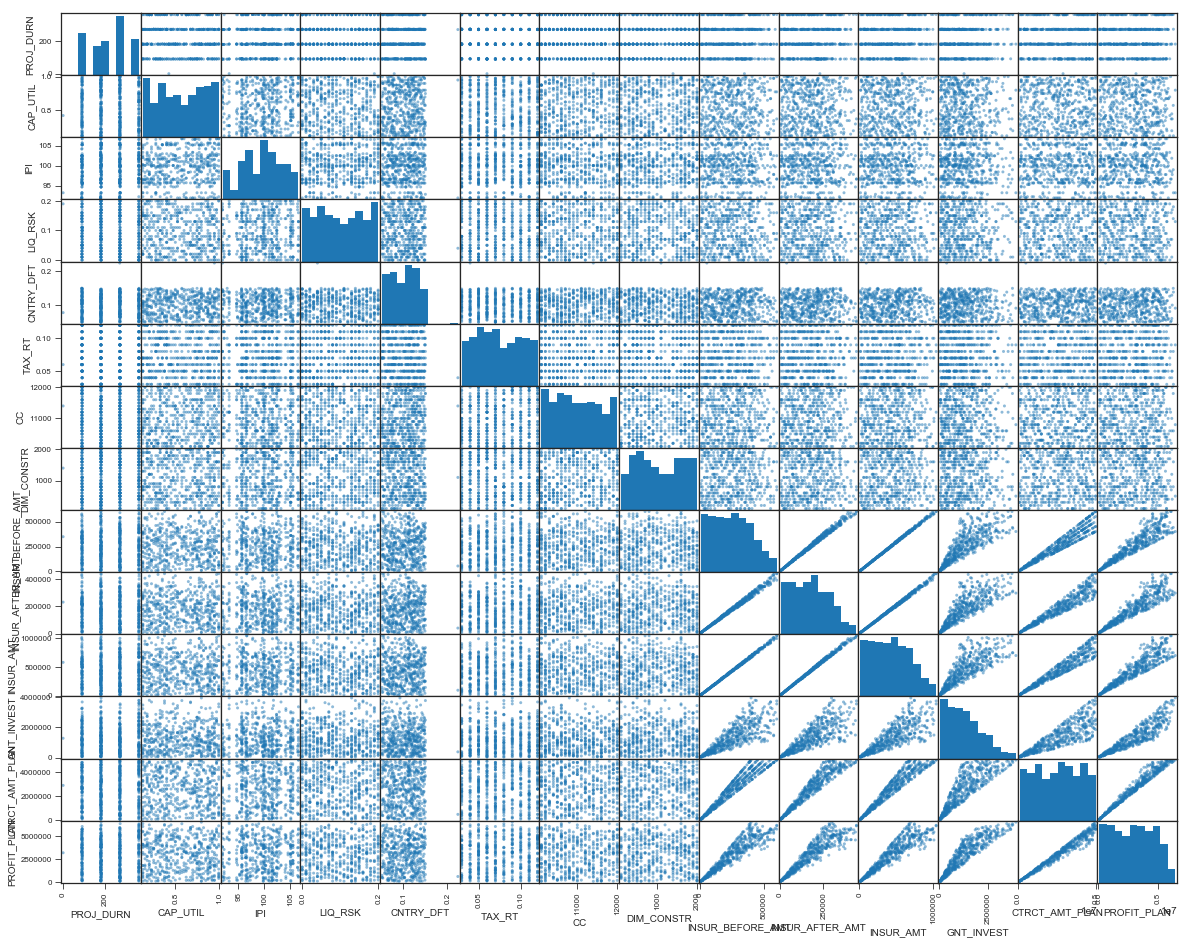

In [11]:
font = {'weight' : 'normal',
        'size'   : 10}

plt.rc('font', **font)
plt.rc('axes', titlesize=30)     # fontsize of the axes title

from pandas.plotting import scatter_matrix

numeric_features = ['PROJ_DURN', 'CAP_UTIL', 'IPI', 'LIQ_RSK', 'CNTRY_DFT', 'TAX_RT', 'CC', 'DIM_CONSTR',
                    'INSUR_BEFORE_AMT', 'INSUR_AFTER_AMT', 'INSUR_AMT', 'GNT_INVEST', 'CTRCT_AMT_PLAN']

target = ['PROFIT_PLAN']

attributes = ["INSUR_AMT", "INSUR_BEFORE_AMT", "INSUR_AFTER_AMT", "CTRCT_AMT_PLAN", "GNT_INVEST", "PROFIT_PLAN"]
scatter_matrix(globex_df[numeric_features+target], figsize=(20, 16));

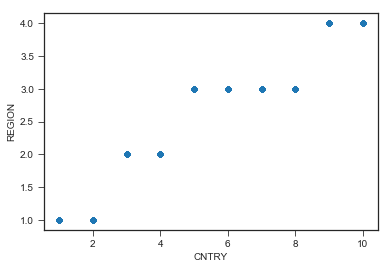

In [12]:
globex_df.plot(kind='scatter', x='CNTRY', y='REGION')

From our data visual data inspection above we can observe the following about the variables:<br>
- We have 27 attribuites in our dataset (26 possible features and one target).<br>
- All attributes are in numeric format.<br>
- Since Globex is seeking information on key predictors for <b>PROFIT_PLAN</b>, then this will be our target variable for this analysis.
- We have <b>13</b> numeric variables that are continious in nature <b>(IPROJ_DURN, CAP_UTIL, IPI, LIQ_RSK, CNTRY_DFT, TAX_RT, CC, DIM_CONSTR, INSUR_BEFORE_AMT, INSUR_AFTER_AMT, INSUR_AMT, GNT_INVEST, CTRCT_AMT_PLAN)</b>. These variables will require scaling before they are used in modeling.<br>
- We have <b>13</b> numeric variables <b>(PPROJ_CD_TFD, R1, R2, R3, R4, R5, R6, R7, FTE_INT, FTE_CONTR, CNTRY, REGION, CUST)</b> that are discrete. Some may need to be tranformed to nominal variables of values (0,1) before they are used in modeling.<br>
- There appears to be a strong +ve correlation between the 5 numeric attributes <b>INSUR_BEFORE_AMT, INSUR_AFTER_AMT, INSUR_AMT, GNT_INVEST, CTRCT_AMT_PLAN</b> and each other and between them and the target <b>PROFIT_PLAN</b> so these are candidate predictors
- There appears to be no linear correlation between <b>PROFIT_PLAN</b> and any of the remaining continious or discrete numeric variables.
- Nearly half the projects are in <b>REGION=3</b> to which 4 of the CNRTYs are allocated

# 4. Feature Selection
We are going to use several methods to try and discover the features that will be strong predictors for customer churn. Specifically we will try the following techniques:

- <b>Correlations</b>: this will help identify features pairs that are strongly correlated with each other so that we can remove one feature of them. Also correlation will identify numeric features that are highly correlated with the target variable to select as predictors for modeling
- <b>Box Plots</b> help us visualize the relationship between discrete variables and PROFIT_PLAN to see if there is variation in PROFIT_PLAN as a result of change in values for each of the features. This should help us identify which features qualify as a predictors for PROFIT_PLAN.
- <b>SelectKBest method</b>: this is a scikit learn object that ranks a list of features according to their predictice impact by assigning a score to each feature
- <b>Training a linear regression model</b> with each of the possible predictors to see the impact of each feature on model RMSE

## 4.1 Correlations
Now we check the Pearsom correlation between the continious features to see if any of the features pairs are highly correlated and as a result we can exclude one of the features of the pairs

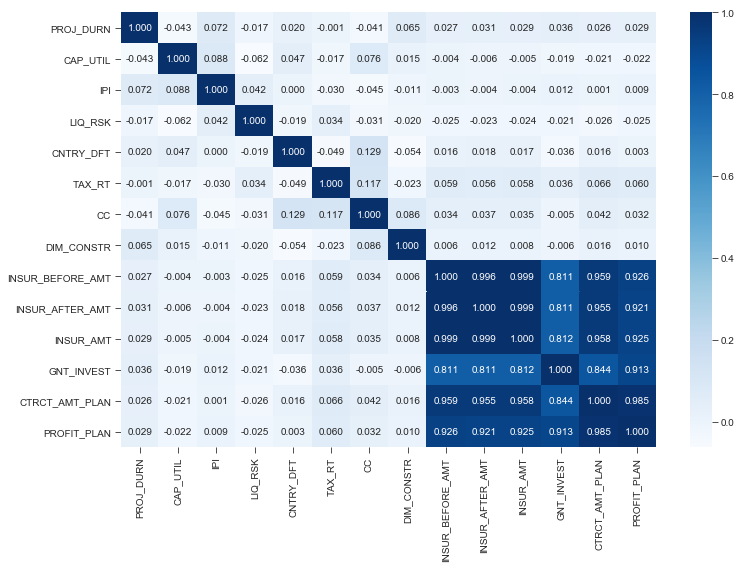

In [13]:
#check for correlations between numeric features. Rule, if two features that are highly correlated one should be dropped
# Does scaling make a difference in result ???? No, no need to scale features before running corr(), you will get the same scores. Try it yourself!

font = {'weight' : 'normal',
        'size'   : 10}

plt.rc('font', **font)
plt.rc('axes', titlesize=30)     # fontsize of the axes title

#plt.style.use('default')
plt.figure(figsize=(12, 8))
sns.heatmap(globex_df[numeric_features+target].corr(),  cmap="Blues", annot=True, fmt=".3f")

- The heat map above shows a very strong correlation of 0.99 to 1.00 between <b>INSUR_BEFORE_AMT, INSUR_AFTER_AMT, INSUR_AMT</b> and each other and between each of them and the target <b>PROFIT_PLAN</b> so we can select one of them to use as a predictor. We shall select <b>INSUR_AMT</b> since it is the sum of both.
- There is also a strong +ve correlation <b>GNT_INVEST</b> and the target variable so shall select it as a predictor for modeling as well.
- There is also a very strong +ve correlation <b>CTRCT_AMT_PLAN</b> and the target variable so shall select it as a predictor for modeling as well.
- There is a strong +ve correlation between <b>INSUR_AMT</b> and <b>CTRCT_AMT_PLAN</b> of 0.95 so we shall evaluate how including one of them vs both affects our model performance.
- Other numeric variables have very low linear correlation with each other and with PROFIT_PLAN

## 4.2 Box plots to compare categorical variables against the target variables
Let us check the 21 dsicrete numeric features that we have in the dataset against <b>PROFIT_PLAN</b>.

Text(0.5,0.93,'PROFIT_PLAN grouped by different discrete variables')

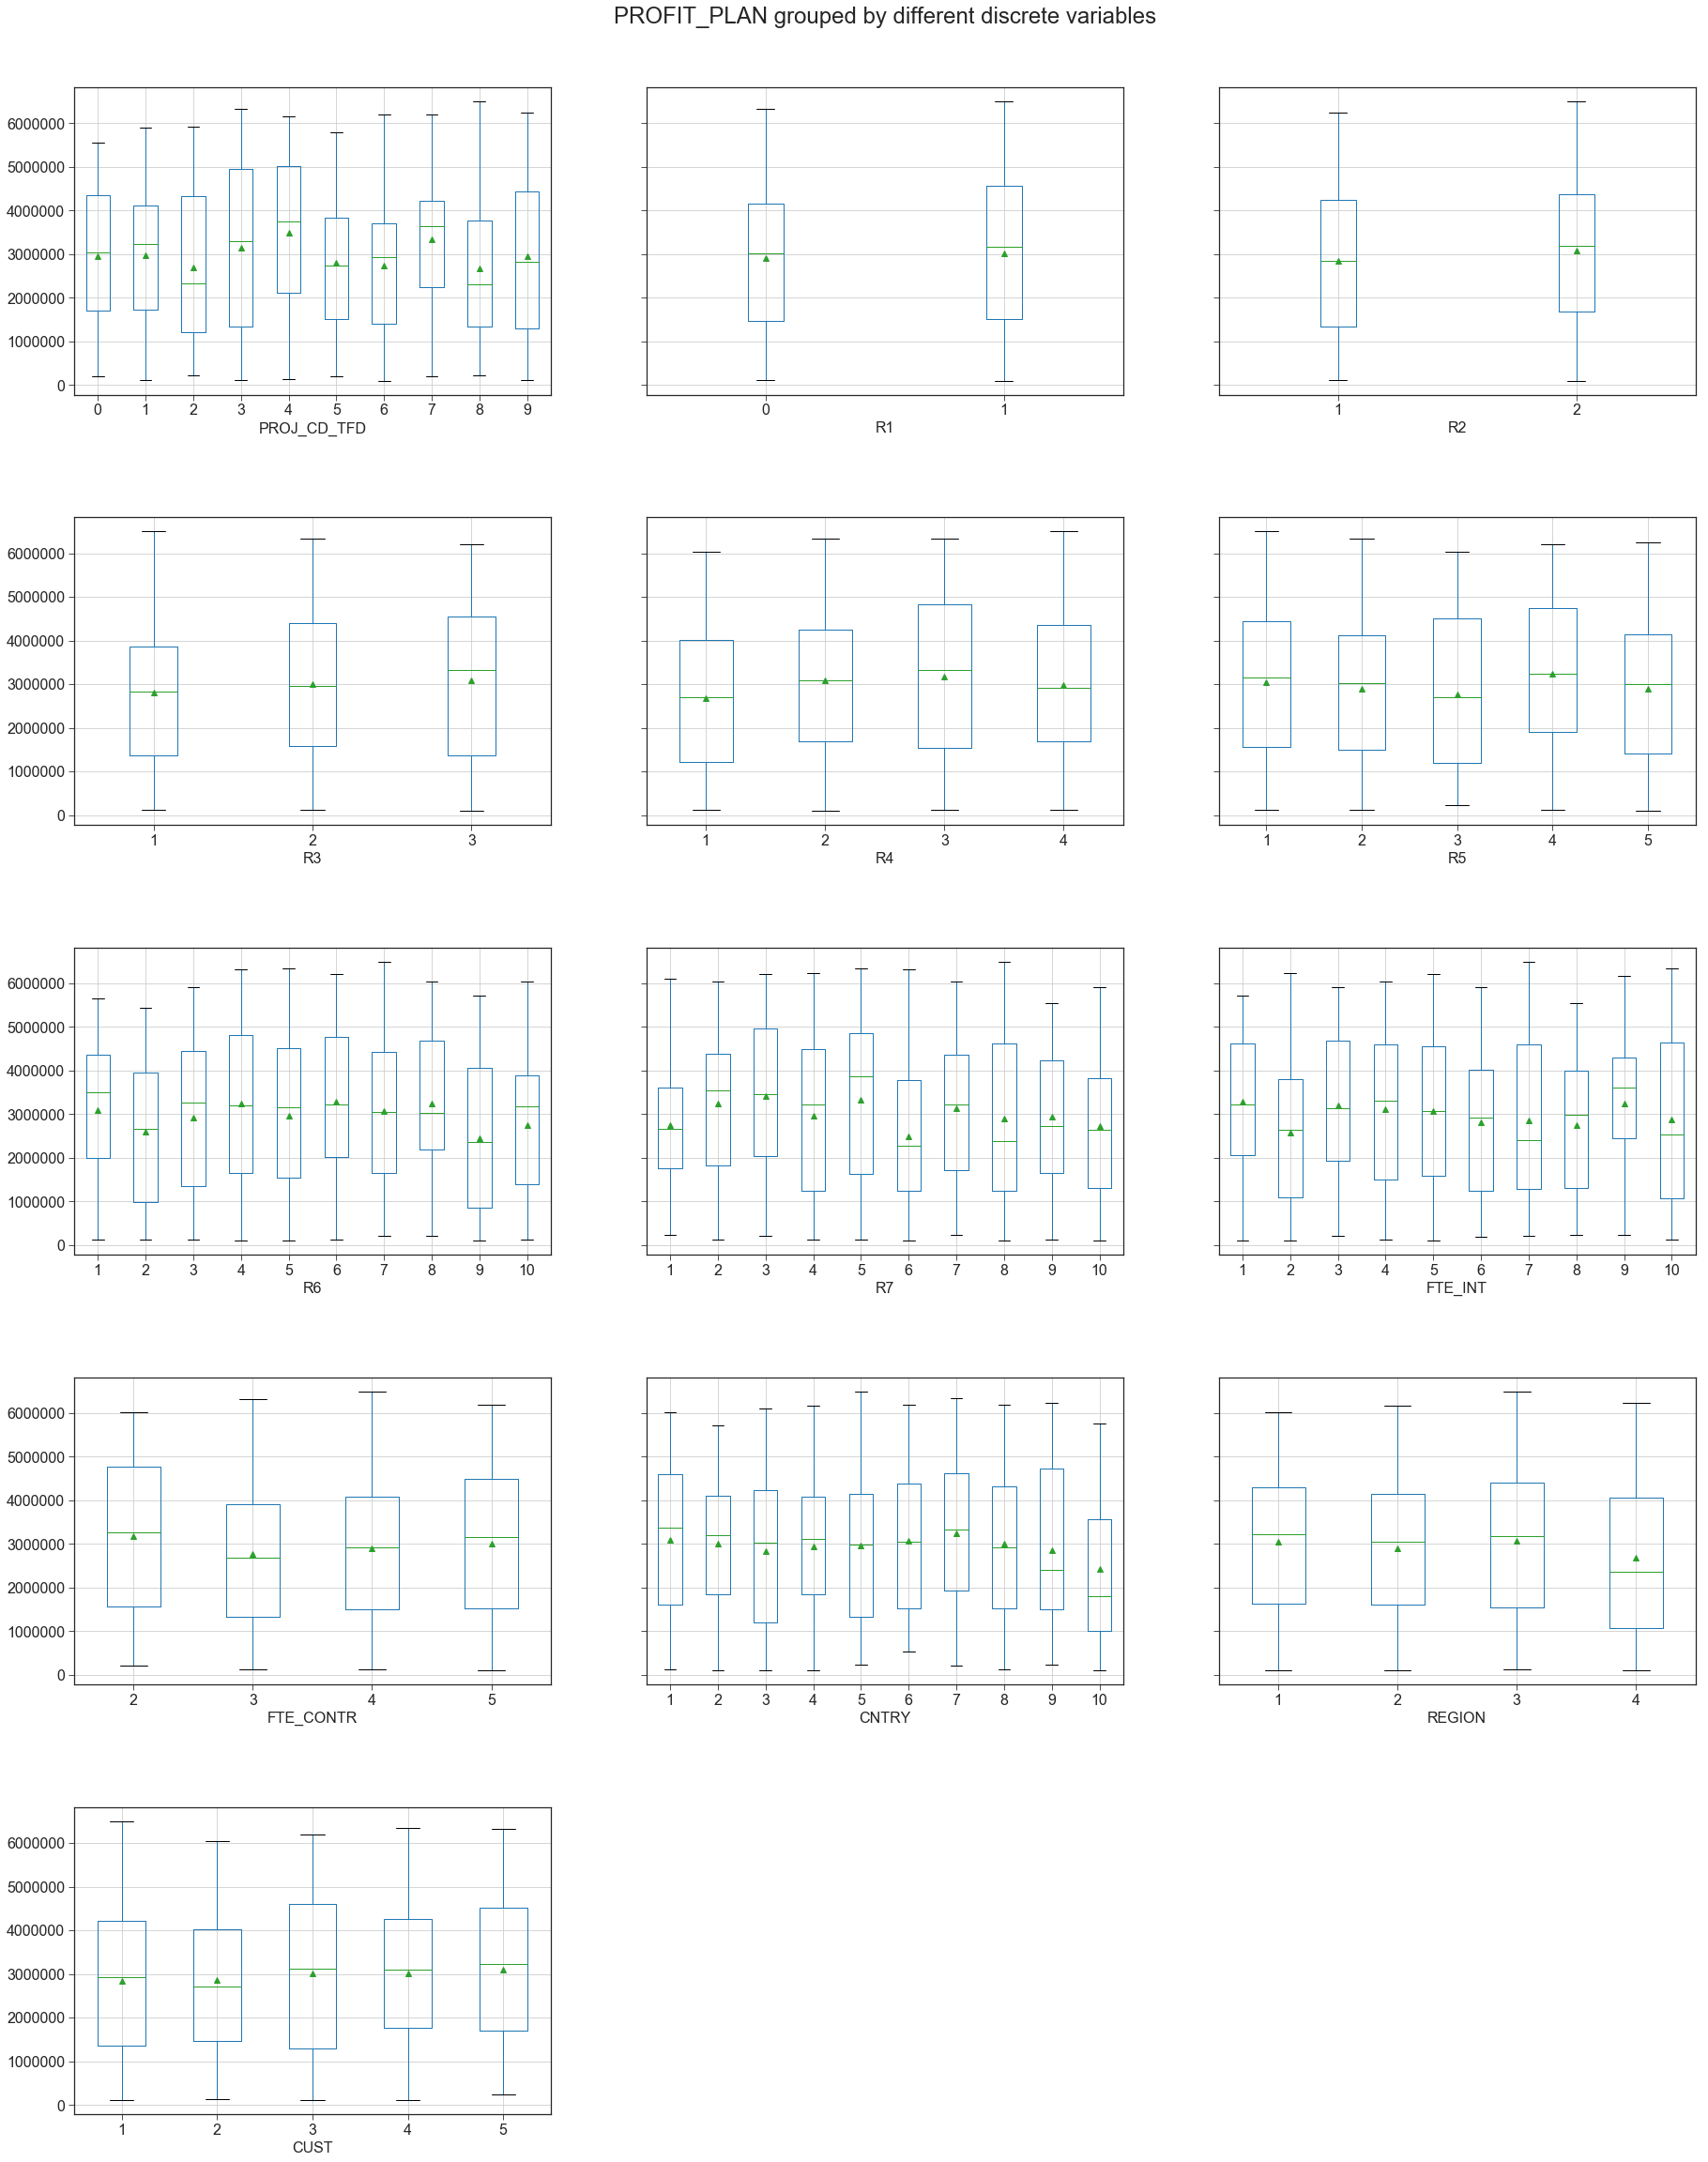

In [14]:
target = 'PROFIT_PLAN'

font = {'weight' : 'normal',
        'size'   : 16}

plt.rc('font', **font)
plt.rc('axes', titlesize=30)     # fontsize of the axes title

num = len(categorical_features)

fig_columns = 3
fig_rows = int(num / fig_columns) + int(num % fig_columns > 0)

fig, axs = plt.subplots(fig_rows, fig_columns, sharex=False, sharey=True, figsize=(30,40))
plt.subplots_adjust(hspace=0.4)

for i, feat in enumerate(categorical_features):
    ax = globex_df.boxplot(target, by=categorical_features[i], ax = axs[int(i/fig_columns), int(i%fig_columns)], showmeans=True)
    ax.set_title('')
    fig2 = ax.get_figure()
    fig2.suptitle('')
     
for j in range(i+1, fig_columns*fig_rows):
    fig.delaxes(axs[int(j/fig_columns), int(j%fig_columns)])
    
fig.suptitle('PROFIT_PLAN grouped by different discrete variables', fontsize=24, y=0.93)

The box plots above provides the following information about the relationship between each of the discrete variables and <b>PROFIT_PLAN</b>:
- There is very little difference in PROFIT_PLAN mean with changing values for R1, R2 and R3
- There is  little difference in PROFIT_PLAN mean with changing values for R4
- There is a noticable different in PROFIT_PLAN means with changing values for PROJ_CD_TFD, R5, R6, R7, FTE_INT, FTE_CONTR, CNTRY, REGION, CUST which makes them candidate predictors for PROFIT_PLAN

## 4.3 SelectKBest Method
SelectKBest is an object from Scikit Learn library that we can used for automatic feature selection. SelectKBest ranks all features based on their importance as predictors for the target variable using different statistical methods. We use it here as a validation of our selected features.

In [15]:
# Feature Extraction with Univariate Statistical Tests
pd.set_option('display.expand_frame_repr', False)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# No need to scale features before running SelectKBest(), you will get the same scores. Try it yourself!

features_to_test = numeric_features + categorical_features

X = globex_df[features_to_test]
Y = globex_df[target]

# feature extraction
selector = SelectKBest(score_func=f_regression, k=2)
selector.fit(X, Y)

#scores = -np.log10(selector.pvalues_)
scores = selector.scores_

# summarize scores
np.set_printoptions(precision=3, suppress=True)
pd.options.display.float_format = '{:.3f}'.format
scored_features = pd.DataFrame({'Feature': features_to_test, 'Score' : scores})
scored_features.sort_values(by = 'Score', ascending=False, inplace=True)
scored_features = scored_features.reset_index(drop=True)
scored_features.head(26)

#features = fit.transform(X) # get the array of observations for top 5 features, NICE!!
#print(features)

,Feature,Score
0,CTRCT_AMT_PLAN,15898.227
1,INSUR_BEFORE_AMT,3004.314
2,INSUR_AMT,2950.809
3,INSUR_AFTER_AMT,2789.868
4,GNT_INVEST,2481.681
5,R2,2.260
6,R4,2.240
7,R3,1.972
8,TAX_RT,1.818
9,R7,1.722


## 4.4 Train Linear Regression model using the 3 main features with strong correlations
In this step we will train linear regression model with the main three correlated features with PROFIT_PLAN, namely <b>INSUR_AMT, GNT_INVEST, CTRCT_AMT_PLAN</b> to estimate our initial training Root Mean Squared Error (RMSE)

In [16]:
def train_rmse(model, features_df, target_df, feat_name, dummies=False):
    from sklearn.model_selection import train_test_split
    from sklearn import metrics
    from sklearn.model_selection import cross_val_score
    from sklearn.preprocessing import MinMaxScaler

    y = target_df
    X = features_df
    
    features_names = X.columns.values
    
    if(dummies==True):
        X = pd.get_dummies(X, columns= [feat_name], drop_first=True)

    # ALWAYS SPLIT FIRST BEFORE SCALING TO AVOID PREDICTOR LEAKAGE !!!!!

    #Train Test Split, reserve test subset for final accuracy and other metrics calculations
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    scaler = MinMaxScaler(feature_range = (0, 1))
    scaler.fit(X_train) # fit the scaler on training data then apply to training and test data
    X_train = scaler.transform(X_train)
    X_test =  scaler.transform(X_test)
    
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    
    if(feat_name == ''):
        print("Linear regression RMSE for main numeric features",features_names, 'is {:,.2f}'.format(sqrt(-scores.mean())))
    else:
        print("Linear regression RMSE for main numeric features plus",feat_name, 'is {:,.2f}'.format( sqrt(-scores.mean())))
    

selected_features = ['INSUR_AMT', 'GNT_INVEST', 'CTRCT_AMT_PLAN']

from math import sqrt
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

features_df = globex_df[selected_features]
target_df = globex_df[target]
train_rmse(lm, features_df, target_df, '', dummies=False)

Linear regression RMSE for main numeric features ['INSUR_AMT' 'GNT_INVEST' 'CTRCT_AMT_PLAN'] is 89,201.62


## 4.5 Train Linear Regression model using the all numeric features
Next we add the remaining continious numeric features to see their contribution to the training RMSE. As we see below they do not contribute to improving the RMSE so we can discard them

In [17]:
selected_features = numeric_features

from math import sqrt
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

features_df = globex_df[selected_features]
target_df = globex_df[target]
train_rmse(lm, features_df, target_df, '', dummies=False)

Linear regression RMSE for main numeric features ['PROJ_DURN' 'CAP_UTIL' 'IPI' 'LIQ_RSK' 'CNTRY_DFT' 'TAX_RT' 'CC'
 'DIM_CONSTR' 'INSUR_BEFORE_AMT' 'INSUR_AFTER_AMT' 'INSUR_AMT'
 'GNT_INVEST' 'CTRCT_AMT_PLAN'] is 89,800.15


## 4.6 Train the model using the 3 main features plus one each of the discrete features
This will help us evaluate which of the discreate numeric features contribute to lowering the model RMSE vs increaing RMSE. As we see below only R4 improves the model RMSE

In [18]:
selected_features = ['INSUR_AMT', 'GNT_INVEST', 'CTRCT_AMT_PLAN']

for i, feat in enumerate(categorical_features):
    features_df = globex_df[selected_features + [feat]]
    train_rmse(lm, features_df, target_df, feat, dummies=True)

print('Done')

Linear regression RMSE for main numeric features plus PROJ_CD_TFD is 90,263.02
Linear regression RMSE for main numeric features plus R1 is 89,462.12
Linear regression RMSE for main numeric features plus R2 is 89,319.32
Linear regression RMSE for main numeric features plus R3 is 89,435.59
Linear regression RMSE for main numeric features plus R4 is 88,338.93
Linear regression RMSE for main numeric features plus R5 is 89,413.89
Linear regression RMSE for main numeric features plus R6 is 91,114.99
Linear regression RMSE for main numeric features plus R7 is 90,369.12
Linear regression RMSE for main numeric features plus FTE_INT is 90,644.11
Linear regression RMSE for main numeric features plus FTE_CONTR is 90,056.30
Linear regression RMSE for main numeric features plus CNTRY is 89,959.42
Linear regression RMSE for main numeric features plus REGION is 89,753.19
Linear regression RMSE for main numeric features plus CUST is 89,557.46
Done


## 4.7 Selected Features
Based on the analysis above we have identified the following features as predictors for <b>PROFIT_PLAN</b> to be used in our modeling:<br>
- Based on strong correlation to PROFIT_PLAN
    - INSUR_AMT
    - GNT_INVEST
    - CTRCT_AMT_PLAN
- Based on its effect in lowering the linear model RMSE
    - R4

Other numeric features make RMSE worse so they can be discarded from our modeling

# 5. Modeling
In the section we will focus finding the best model in order to predict PROFIT_PLAN for Globex. Since <b>PROFIT_PLAN</b> is a continious variable then our problem is mainly a regression problem. We will try different regression models to see which one yields the highest training accuracy, then we will fine tune our most accurate model in order to arrive at the bet testing accuracy.

## 5.1 Feature Scaling
Before modeling we need to do feature scaling in order to standardize our measurement scale for all numeric features

In [19]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

final_features = ['INSUR_AMT', 'GNT_INVEST', 'CTRCT_AMT_PLAN', 'R4']

X = globex_df[final_features]
y = globex_df[target]

X = pd.get_dummies(X, columns= ['R4'], drop_first=True)

# ALWAYS SPLIT FIRST BEFORE SCALING TO AVOID PREDICTOR LEAKAGE !!!!!

#Train Test Split, reserve test subset for final accuracy and other metrics calculations
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(X_train) # fit the scaler on training data then apply to training and test data
X_train = scaler.transform(X_train)
X_test =  scaler.transform(X_test)
print('Done')

Done


## 5.2 Modeling (using different models)
Now lets try different regression models and see which one yields the best training accuracy. We will try the following models:
- Linear Regression
- Decision Tree Regressor
- K Nearest Neighours Regressor
- Polynomial Regression of different degrees

In [20]:
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor

def display_scores(modelname, scores):
    print(modelname)
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std(), '\n')

lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
display_scores("Linear regression RMSE metrics are:", np.sqrt(-scores))

X_train_cont = X_train[:, 0:3]
X_train_disc = X_train[:, 3:]

poly2 = PolynomialFeatures(2)
X_transform_cont = poly2.fit_transform(X_train_cont)
X_transform = np.concatenate((X_transform_cont, X_train_disc), axis=1)
scores = cross_val_score(lm, X_transform, y_train, cv=5, scoring='neg_mean_squared_error')
display_scores("Polynomial Regression 2 RMSE metrics are:", np.sqrt(-scores))

poly3 = PolynomialFeatures(3)
X_transform_cont = poly3.fit_transform(X_train_cont)
X_transform = np.concatenate((X_transform_cont, X_train_disc), axis=1)
scores = cross_val_score(lm, X_transform, y_train, cv=5, scoring='neg_mean_squared_error')
display_scores("Polynomial Regression 3 RMSE metrics are:", np.sqrt(-scores))

poly4 = PolynomialFeatures(4)
X_transform_cont = poly4.fit_transform(X_train_cont)
X_transform = np.concatenate((X_transform_cont, X_train_disc), axis=1)
scores = cross_val_score(lm, X_transform, y_train, cv=5, scoring='neg_mean_squared_error')
display_scores("Polynomial Regression 4 RMSE metrics are:", np.sqrt(-scores))

poly5 = PolynomialFeatures(5)
X_transform_cont = poly5.fit_transform(X_train_cont)
X_transform = np.concatenate((X_transform_cont, X_train_disc), axis=1)
scores = cross_val_score(lm, X_transform, y_train, cv=5, scoring='neg_mean_squared_error')
display_scores("Polynomial Regression 5 RMSE metrics are:", np.sqrt(-scores))

dcr = DecisionTreeRegressor()
scores = cross_val_score(dcr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
display_scores("DecisionTreeRegressor RMSE metrics are:", np.sqrt(-scores))

knnr = KNeighborsRegressor(n_neighbors=30)
scores = cross_val_score(dcr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
display_scores("KNeighborsRegressor RMSE metrics are:", np.sqrt(-scores))

Linear regression RMSE metrics are:
Scores: [94802.781 99517.573 90334.206 74884.191 79747.162]
Mean: 87857.1828613434
Standard deviation: 9213.171358143174 

Polynomial Regression 2 RMSE metrics are:
Scores: [29385.621 32224.654 29658.612 27939.021 34122.183]
Mean: 30666.018338789923
Standard deviation: 2212.0226025986813 

Polynomial Regression 3 RMSE metrics are:
Scores: [14555.686 15651.902 15199.766 12941.737 19318.022]
Mean: 15533.42260162997
Standard deviation: 2103.3952077939016 

Polynomial Regression 4 RMSE metrics are:
Scores: [ 9361.707 13299.964 12500.172 12779.862 16569.975]
Mean: 12902.335716875752
Standard deviation: 2294.448480714572 

Polynomial Regression 5 RMSE metrics are:
Scores: [27245.11  22347.055  8684.926 13419.536 13028.855]
Mean: 16945.0963364589
Standard deviation: 6801.00533363467 

DecisionTreeRegressor RMSE metrics are:
Scores: [166814.858 193471.455 189803.414 149256.412 153741.6  ]
Mean: 170617.54767392154
Standard deviation: 18143.619898248053 

KNei

As we see above, polynomial regression gives the lowest training RMSE scores with degree 4 polynomial giving the lowest RMSE. In the next section we calculate the testing RMSE to check for possibility of overfitting

# 6. Model Evaluation
In this section we evaluate the best models testing RMSE

## 6.1 Testing accuracy

In [21]:
from sklearn.metrics import mean_squared_error

best_model = lm

poly4 = PolynomialFeatures(4)

X_train_cont = X_train[:, 0:3]
X_train_disc = X_train[:, 3:]

X_train_transform_cont = poly4.fit_transform(X_train_cont)
X_train_transform = np.concatenate((X_train_transform_cont, X_train_disc), axis=1)

best_model.fit(X_train_transform, y_train)

X_test_cont = X_test[:, 0:3]
X_test_disc = X_test[:, 3:]

X_test_transform_cont = poly4.fit_transform(X_test_cont)
X_test_transform = np.concatenate((X_test_transform_cont, X_test_disc), axis=1)
y_pred = best_model.predict(X_test_transform)
print('Fourth Degree Polynomial Regression - Testing RMSE = {:,.2f}'.format(sqrt(mean_squared_error(y_test, y_pred))))

Fourth Degree Polynomial Regression - Testing RMSE = 13,269.55


As we see above testing RMSE of the 4th degree polynomial model is higher than the training RMSE indicating that our model is overfitting the data set, so lets calculate the 3rd degree polynomial testing RMSE to see if it fares better.

In [22]:
poly3 = PolynomialFeatures(3)

X_train_cont = X_train[:, 0:3]
X_train_disc = X_train[:, 3:]

X_train_transform_cont = poly3.fit_transform(X_train_cont)
X_train_transform = np.concatenate((X_train_transform_cont, X_train_disc), axis=1)

best_model.fit(X_train_transform, y_train)

X_test_cont = X_test[:, 0:3]
X_test_disc = X_test[:, 3:]

X_test_transform_cont = poly3.fit_transform(X_test_cont)
X_test_transform = np.concatenate((X_test_transform_cont, X_test_disc), axis=1)
y_pred = best_model.predict(X_test_transform)
print('Third Degree Polynomial Regression - Testing RMSE = {:,.2f}'.format(sqrt(mean_squared_error(y_test, y_pred))))

Third Degree Polynomial Regression - Testing RMSE = 14,612.45


As we can see above, the testing RMSE of the 3rd degree polynomial model is better than its training RMSE (14,612.45 vs 15533.42) indicating that this is best model to choose form our tested models for predicting PROFIT_PLAN

# 7. Conclusions and Recommendations
Based on our analysis we provide the following conclusions and recommendations for the future:
- The strongest four key predictors affecting <B>PROFIT_PLAN</b> are <b>INSUR_AMT, GNT_INVEST, CTRCT_AMT_PLAN and R4</b>
- Projects with CNTRY = 10 has a considerably lower mean PROFIT_PLAN than other projects so further analysis is required to dicover reasons for this and possible avoid projects with this attribute value
- Projects with REGION = 4 has a considerably lower mean PROFIT_PLAN than other projects so further analysis is required to dicover reasons for this and possible avoid projects with this attribute value
- Projects with R7 = 3 and R7 = 5 have the highest mean PROFIT_PLAN so it is recommended to focus more on types of projects with these attribute values and try to replicate the reasons for their higher than average PROFIT_PLAN in other projects.
- Projects with CNTRY = 7 have a considerably higher mean PROFIT_PLAN than other projects so it is recommended to focus more on types of projects with these attribute values and try to replicate the reasons for their higher than average PROFIT_PLAN in other projects.
    